In [4]:
import pandas as pd
import numpy as np
metrics = pd.read_csv('./src/metrics.csv', index_col=0)
metrics[:30]


,app_prefix,node_id,http_endpoint,http_method,http_status,latency
timestamp,,,,,,
1526051807,webapp1,10.1.3.4,test,GET,400,0.609636
1526051807,webapp1,10.0.1.1,test,GET,200,0.091314
1526051807,webapp1,10.0.1.1,test,GET,200,0.085592
1526051807,webapp1,10.1.3.4,test,GET,400,0.082970
1526051807,webapp1,10.1.3.4,test,GET,200,0.076056
1526051807,webapp1,10.0.1.1,test,GET,200,0.076056
1526051807,webapp1,10.0.1.1,test,GET,400,0.072241
1526051807,webapp1,10.0.1.1,test,GET,200,0.074387
1526051807,webapp1,10.0.1.1,test,GET,200,0.071764


In [7]:
metrics.groupby(['node_id', 'http_status']).latency.aggregate(np.mean)

node_id   http_status
10.0.1.1  200            0.047088
          400            0.048214
          500            0.387338
10.1.3.4  200            0.057956
          400            0.059737
          500            0.403446
Name: latency, dtype: float64

In [8]:
metrics.groupby(['node_id', 'http_status']).latency.aggregate(np.percentile, 99.999)

node_id   http_status
10.0.1.1  200            0.068661
          400            0.057935
          500            1.330025
10.1.3.4  200            0.220268
          400            0.162116
          500            1.419507
Name: latency, dtype: float64

In [9]:
metrics.groupby(['http_endpoint', 'http_method']).latency.aggregate(np.percentile, 99)

http_endpoint  http_method
test           GET            0.162706
test1          GET            1.346610
Name: latency, dtype: float64

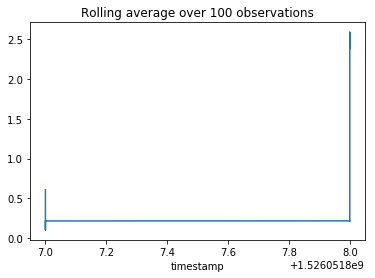

In [6]:
%matplotlib inline
latency = metrics['latency']
rolling_average = latency.rolling(window=100, center=False, min_periods=1).mean()
rolling_average.plot(title='Rolling average over 100 observations', use_index=True)


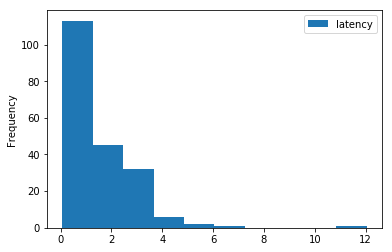

In [7]:
metrics.plot.hist(y='latency')